In [ ]:
!pip install lime shap --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#%tensorflow_version 2.x
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

# Explainable AI Libraries
from lime import lime_image
from skimage.segmentation import mark_boundaries
import shap

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

import zipfile
with zipfile.ZipFile("brain-tumor-mri-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

train_path = "/content/dataset/Training"
test_path = "/content/dataset/Testing"

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

#Preprocess training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150), #Adjusting the target size as needed
    batch_size=32,
    class_mode='categorical',
    classes=class_names
)

#Preprocess testing data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150), #Adjusting the target size as needed
    batch_size=32,
    class_mode='categorical',
    classes=class_names,
    shuffle=False  #Keep order for evaluation
)
#Defining the model
from tensorflow.keras import layers, models

inputs = keras.Input(shape=(150, 150, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#Training the model
model.fit(train_generator, epochs=10)

#Evaluating the model
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print('Test accuracy:', test_acc)

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.5676 - loss: 0.9880
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8105 - loss: 0.4944
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.8457 - loss: 0.4060
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8804 - loss: 0.3244
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.8904 - loss: 0.2801
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9186 - loss: 0.2313
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9302 - loss: 0.1788
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9470 - loss: 0.1598
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9418 - loss: 0.1615
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9471 - loss: 0.1352
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 442ms/step - accuracy: 0.8899 - loss: 0.3046
Test accuracy: 0.9374523162841797


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

def explain_with_lime(img_array, model, class_names=None):
    explainer = lime_image.LimeImageExplainer()

    def predict_fn(images):
        return model.predict(np.array(images))

    explanation = explainer.explain_instance(
        img_array.astype('double'),
        predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    #Getting heatmap + mask from explanation
    image, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=False,   # Show both pos & neg contributions
        num_features=10,
        hide_rest=False
    )

    #Prediction details
    preds = model.predict(img_array[np.newaxis, ...])
    pred_idx = np.argmax(preds)
    confidence = np.max(preds)

    if class_names:
        pred_class = class_names[pred_idx]
        title = f"LIME Explanation\nPrediction: {pred_class} ({confidence:.2f})"
    else:
        title = f"LIME Explanation\nPrediction Index: {pred_idx} ({confidence:.2f})"

    #Plot original and overlay
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(img_array)
    ax1.set_title("Original Image")
    ax1.axis('off')

    ax2.imshow(img_array, alpha=0.6)
    ax2.imshow(label2rgb(mask, image=img_array, bg_label=0), alpha=0.4)
    ax2.set_title(title)
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

#Warming up the model(run one dummy prediction to build the graph)
_ = model.predict(np.zeros((1, 150, 150, 3)))

# SHAP setup
import shap

#Get a small background set (10 samples) from training generator
background = next(train_generator)[0][:10]

#Using GradientExplainer for better compatibility with tf.keras models
explainer_shap = shap.GradientExplainer((model.input, model.output), background)

def explain_with_shap(img_array):
    img_batch = np.expand_dims(img_array, axis=0)
    shap_values = explainer_shap.shap_values(img_batch)

    if isinstance(shap_values, np.ndarray) or (isinstance(shap_values, list) and len(shap_values) == 1):
        #shap_values is (1, 150, 150, 3, 4)
        shap_values = shap_values[0] if isinstance(shap_values, list) else shap_values
        for class_idx in range(shap_values.shape[-1]):
            print(f"SHAP for class: {class_names[class_idx]}")
            shap.image_plot([shap_values[..., class_idx]], img_batch)
    else:
        print("Unexpected SHAP structure:", type(shap_values), np.shape(shap_values))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


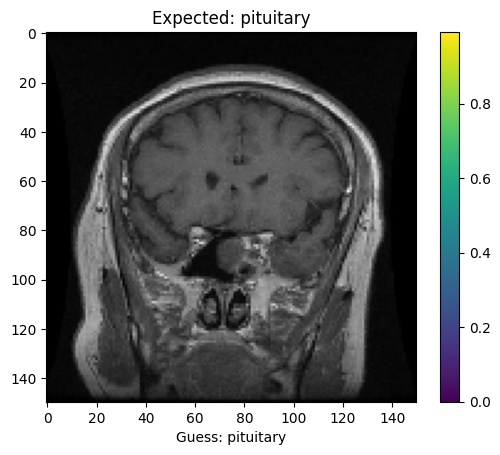

LIME Explanation:


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

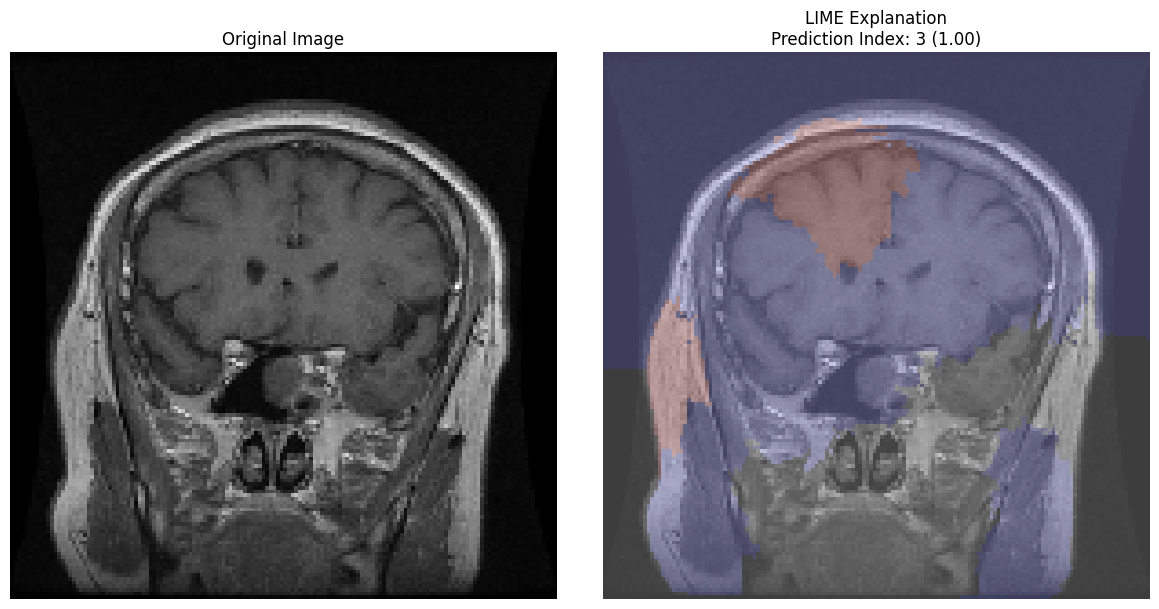

SHAP Explanation:


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=['Tensor(shape=(1, 150, 150, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=['Tensor(shape=(50, 150, 150, 3))']
  warnings.warn(msg)


SHAP for class: glioma


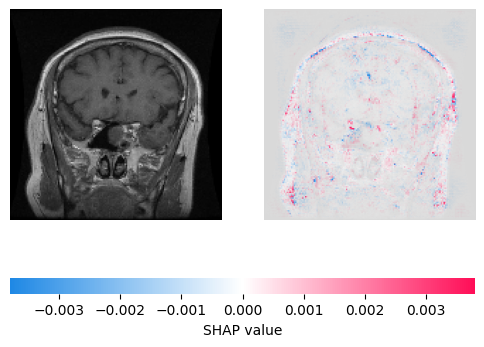

SHAP for class: meningioma


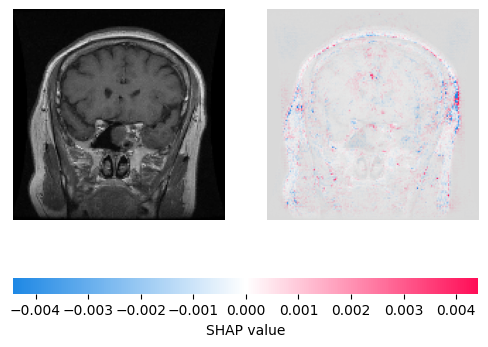

SHAP for class: notumor


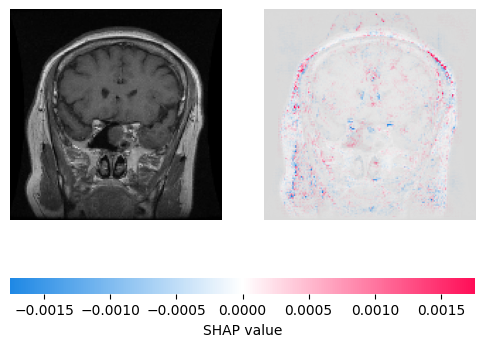

SHAP for class: pituitary


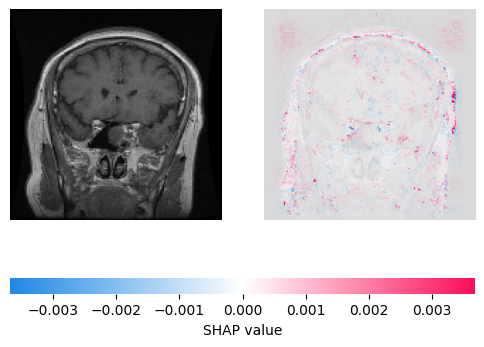

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

def predict(model, image_array, correct_label):
    prediction = model.predict(np.expand_dims(image_array, axis=0)) #Adding the batch dimension
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]
    true_class_name = class_names[correct_label]

    show_image(image_array, true_class_name, predicted_class_name)

    print("LIME Explanation:")
    explain_with_lime(image_array, model)

    print("SHAP Explanation:")
    explain_with_shap(image_array)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number(max_index):
    while True:
        num_str = input(f"Pick a number between 0 and {max_index}: ")
        if num_str.isdigit():
            num = int(num_str)
            if 0 <= num <= max_index:
                return num
        else:
            print("Invalid input. Please enter a number.")

#Getting the labels from the test generator
test_labels = test_generator.classes
#Getting the filenames from the test generator
test_filenames = test_generator.filenames
#Getting the total number of test samples
num_test_samples = len(test_generator.filenames)

#Taking a random index input from the test set
import random
random_index = random.randint(0, num_test_samples - 1)
img_path = os.path.join(test_path, test_filenames[random_index])
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0 #To normalize the pixel values

label = test_labels[random_index]
predict(model, img_array, label)

#To ask the user to pick an input index:
#num = get_number(num_test_samples - 1)
#img_path = os.path.join(test_path, test_filenames[num])
#img = image.load_img(img_path, target_size=(150, 150))
#img_array = image.img_to_array(img) / 255.0
#label = test_labels[num]
#predict(model, img_array, label)